In [1]:
cd /mnt/beegfs/scratch/data/S82_standards/

/mnt/beegfs/scratch/data/S82_standards


In [2]:
ls outputs/

In [3]:
%matplotlib inline

import hipscat
import hipscat_import
import pandas as pd
import multiprocessing as mp
import glob
from tqdm import tqdm
import os.path
import numpy as np
import healpy as hp
import glob

import lsdb

pd.set_option('display.max_columns', None)

In [4]:
ls outputs/

In [5]:
bandCols=['Nobs', 'mmed', 'mmu', 'msig', 'mrms', 'mchi2']
s82 = pd.read_table("stripe82calibStars_v4.2.dat",header=None, comment='#', sep=r"\s+", names=['CALIBSTARS','ra', 'dec', 'RArms', 'Decrms','Ntot','Ar']+
                                                                          ['u'+c for c in bandCols]+
                                                                          ['g'+c for c in bandCols]+
                                                                          ['r'+c for c in bandCols]+
                                                                          ['i'+c for c in bandCols]+
                                                                          ['z'+c for c in bandCols])

In [6]:
%%time
catalog = lsdb.from_dataframe(s82, catalog_name="S82", drop_empty_siblings=True, highest_order=5)

CPU times: user 46.3 s, sys: 471 ms, total: 46.8 s
Wall time: 46.8 s


In [7]:
catalog.compute()

,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,ummed,ummu,umsig,umrms,umchi2,gNobs,gmmed,gmmu,gmsig,gmrms,gmchi2,rNobs,rmmed,rmmu,rmsig,rmrms,rmchi2,iNobs,immed,immu,imsig,imrms,imchi2,zNobs,zmmed,zmmu,zmsig,zmrms,zmchi2,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
715281479499776,CALIBSTARS_0891163,43.787097,1.037784,0.0282,0.0282,24,0.256,23,19.544,19.547,0.007,0.044,1.034,22,17.958,17.958,0.004,0.015,0.71,21,17.287,17.288,0.003,0.004,0.302,22,17.024,17.027,0.003,0.014,0.949,23,16.886,16.891,0.004,0.017,0.835,4,0,0
715101011181568,CALIBSTARS_0891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.47,18.469,0.005,0.028,1.098,24,17.38,17.378,0.004,0.019,1.014,23,16.973,16.973,0.003,0.013,0.944,23,16.812,16.81,0.003,0.009,0.627,24,16.748,16.75,0.004,0.011,0.611,4,0,0
714770441306112,CALIBSTARS_0891200,43.831573,1.024147,0.0315,0.0315,25,0.254,8,22.873,22.887,0.136,0.15,0.342,24,20.266,20.267,0.006,0.022,0.76,23,18.816,18.814,0.004,0.009,0.45,25,18.018,18.023,0.003,0.015,0.829,25,17.567,17.566,0.005,0.018,0.706,4,0,0
712559007105024,CALIBSTARS_0891206,43.870259,0.983584,0.0259,0.0259,25,0.253,25,21.136,21.113,0.019,0.09,0.76,25,19.771,19.775,0.005,0.019,0.586,25,19.245,19.242,0.004,0.016,0.742,25,19.03,19.033,0.004,0.017,0.784,24,18.919,18.924,0.01,0.036,0.787,4,0,0
713770364043264,CALIBSTARS_0891209,43.884348,1.028387,0.0506,0.0506,25,0.251,25,19.421,19.411,0.007,0.036,1.13,25,17.74,17.738,0.004,0.021,0.949,25,17.089,17.09,0.003,0.011,0.764,24,16.85,16.848,0.003,0.016,1.029,23,16.731,16.73,0.004,0.014,0.744,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13834351349564702720,CALIBSTARS_0218913,316.124689,-0.984808,0.0322,0.0322,16,0.175,12,21.903,21.876,0.058,0.182,0.693,14,21.165,21.165,0.013,0.032,0.688,15,20.899,20.895,0.013,0.036,0.57,16,20.793,20.768,0.017,0.051,0.701,10,20.744,20.665,0.066,0.158,0.791,4,0,3071
13834353321231515648,CALIBSTARS_0218915,316.057052,-0.95856,0.0349,0.0349,15,0.185,9,22.975,22.955,0.138,0.163,0.371,15,21.535,21.545,0.017,0.071,0.908,14,21.02,21.002,0.015,0.055,1.019,15,20.82,20.774,0.017,0.068,1.157,13,20.602,20.582,0.054,0.096,0.502,4,0,3071
13834351427796860928,CALIBSTARS_0218917,316.133306,-0.971373,0.041,0.041,16,0.174,3,24.789,24.878,0.611,0.09,0.095,13,22.356,22.341,0.034,0.075,0.577,16,21.081,21.081,0.015,0.061,0.923,16,20.525,20.51,0.013,0.057,1.156,13,20.048,20.061,0.034,0.2,1.482,4,0,3071


In [8]:
type(catalog)

lsdb.catalog.catalog.Catalog

In [9]:
rm -rf S82_hipscat/

In [10]:
catalog.to_hipscat("S82_hipscat", overwrite=True)

In [28]:
!du -sh S82_hipscat/*

512	S82_hipscat/catalog_info.json
16K	S82_hipscat/_common_metadata
54K	S82_hipscat/_metadata
49M	S82_hipscat/Norder=0
6.8M	S82_hipscat/Norder=2
12M	S82_hipscat/Norder=3
4.5M	S82_hipscat/Norder=4
512	S82_hipscat/partition_info.csv
1.0K	S82_hipscat/provenance_info.json


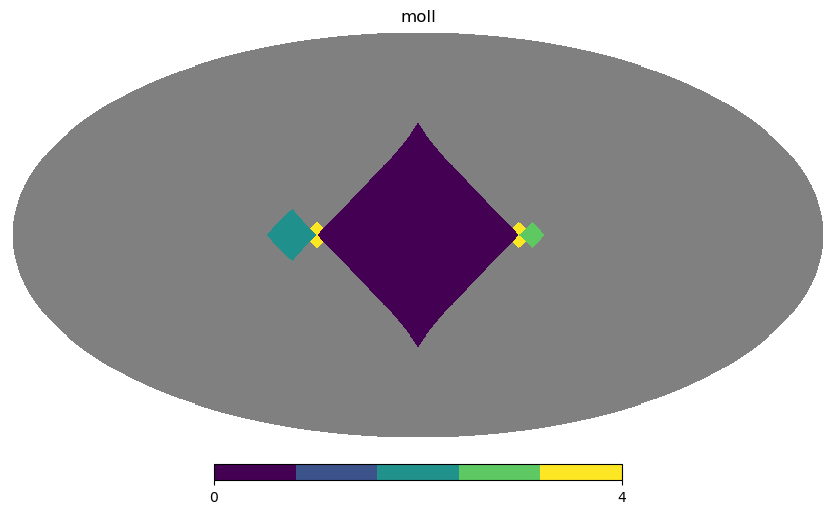

In [29]:
catalog.plot_pixels()

In [17]:
catalog.plot_pixels?

Signature: catalog.plot_pixels(projection: 'str' = 'moll', **kwargs)
Docstring:
Create a visual map of the pixel density of the catalog.

Args:
    projection (str) The map projection to use. Valid values include:
        - moll - Molleweide projection (default)
        - gnom - Gnomonic projection
        - cart - Cartesian projection
        - orth - Orthographic projection
    kwargs (dict): additional keyword arguments to pass to plotting call.
File:      /nvme/lovro/miniconda3/envs/photoD-dev/lib/python3.12/site-packages/lsdb/catalog/dataset/healpix_dataset.py
Type:      method

In [18]:
catalog.compute()

,CALIBSTARS,ra,dec,RArms,Decrms,Ntot,Ar,uNobs,ummed,ummu,umsig,umrms,umchi2,gNobs,gmmed,gmmu,gmsig,gmrms,gmchi2,rNobs,rmmed,rmmu,rmsig,rmrms,rmchi2,iNobs,immed,immu,imsig,imrms,imchi2,zNobs,zmmed,zmmu,zmsig,zmrms,zmchi2,Norder,Dir,Npix
_hipscat_index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
715281479499776,CALIBSTARS_0891163,43.787097,1.037784,0.0282,0.0282,24,0.256,23,19.544,19.547,0.007,0.044,1.034,22,17.958,17.958,0.004,0.015,0.71,21,17.287,17.288,0.003,0.004,0.302,22,17.024,17.027,0.003,0.014,0.949,23,16.886,16.891,0.004,0.017,0.835,4,0,0
715101011181568,CALIBSTARS_0891187,43.828101,1.040223,0.4066,0.4066,47,0.253,24,18.47,18.469,0.005,0.028,1.098,24,17.38,17.378,0.004,0.019,1.014,23,16.973,16.973,0.003,0.013,0.944,23,16.812,16.81,0.003,0.009,0.627,24,16.748,16.75,0.004,0.011,0.611,4,0,0
714770441306112,CALIBSTARS_0891200,43.831573,1.024147,0.0315,0.0315,25,0.254,8,22.873,22.887,0.136,0.15,0.342,24,20.266,20.267,0.006,0.022,0.76,23,18.816,18.814,0.004,0.009,0.45,25,18.018,18.023,0.003,0.015,0.829,25,17.567,17.566,0.005,0.018,0.706,4,0,0
712559007105024,CALIBSTARS_0891206,43.870259,0.983584,0.0259,0.0259,25,0.253,25,21.136,21.113,0.019,0.09,0.76,25,19.771,19.775,0.005,0.019,0.586,25,19.245,19.242,0.004,0.016,0.742,25,19.03,19.033,0.004,0.017,0.784,24,18.919,18.924,0.01,0.036,0.787,4,0,0
713770364043264,CALIBSTARS_0891209,43.884348,1.028387,0.0506,0.0506,25,0.251,25,19.421,19.411,0.007,0.036,1.13,25,17.74,17.738,0.004,0.021,0.949,25,17.089,17.09,0.003,0.011,0.764,24,16.85,16.848,0.003,0.016,1.029,23,16.731,16.73,0.004,0.014,0.744,4,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13834351349564702720,CALIBSTARS_0218913,316.124689,-0.984808,0.0322,0.0322,16,0.175,12,21.903,21.876,0.058,0.182,0.693,14,21.165,21.165,0.013,0.032,0.688,15,20.899,20.895,0.013,0.036,0.57,16,20.793,20.768,0.017,0.051,0.701,10,20.744,20.665,0.066,0.158,0.791,4,0,3071
13834353321231515648,CALIBSTARS_0218915,316.057052,-0.95856,0.0349,0.0349,15,0.185,9,22.975,22.955,0.138,0.163,0.371,15,21.535,21.545,0.017,0.071,0.908,14,21.02,21.002,0.015,0.055,1.019,15,20.82,20.774,0.017,0.068,1.157,13,20.602,20.582,0.054,0.096,0.502,4,0,3071
13834351427796860928,CALIBSTARS_0218917,316.133306,-0.971373,0.041,0.041,16,0.174,3,24.789,24.878,0.611,0.09,0.095,13,22.356,22.341,0.034,0.075,0.577,16,21.081,21.081,0.015,0.061,0.923,16,20.525,20.51,0.013,0.057,1.156,13,20.048,20.061,0.034,0.2,1.482,4,0,3071
